In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_theme(style="whitegrid")
sns.color_palette("rocket", as_cmap=True)
sns.set_palette("pastel")
#hide all warnings
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [163]:
data_dir = "../data/"
plots_dir = "../plots/"

In [164]:
reviews = pd.read_csv(data_dir+"reviews.csv")
reviews.drop("Unnamed: 0", inplace=True, axis=1)

In [165]:
reviews["game_name"]=reviews.game_name.str.split("       ",expand=True,)[0]
reviews.head()

,game_id,game_name,score,author,date,summary
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...
2,0,Disco Elysium: The Final Cut,100,KeenGamer,"Apr 26, 2021","Enhanced with fantastic and fresh content, Dis..."
3,0,Disco Elysium: The Final Cut,100,GameSpot,"Apr 15, 2021",A fully voiced cast and new content of compara...
4,0,Disco Elysium: The Final Cut,100,Wccftech,"Apr 15, 2021",Disco Elysium: The Final Cut doesn't shy away ...


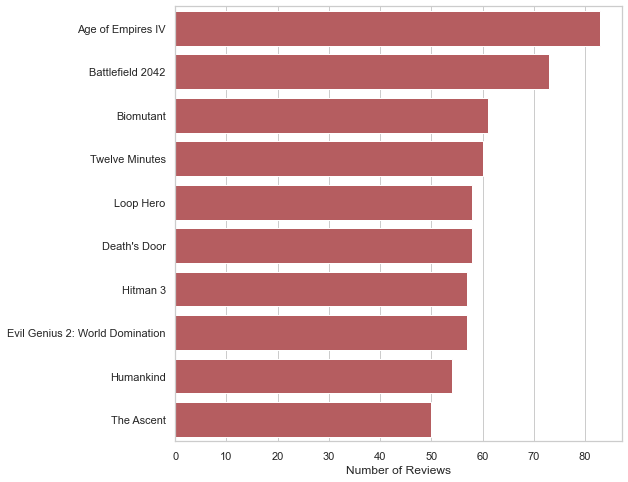

In [166]:
#number of reviews for games
data = pd.DataFrame(reviews.game_name.value_counts()[:10])
data.reset_index(inplace=True)
sns.barplot(x="game_name", y="index", data=data, color="r")
plt.xlabel("Number of Reviews")
plt.ylabel("");

In [167]:
stop_words=set(stopwords.words("english"))

#tokenised list of reviews that do not contain stop words
def tokenized_summary(x):
    filtered_sent=[]
    for w in word_tokenize(x):
        if w not in stop_words:
            filtered_sent.append(w)
    return filtered_sent

reviews["tokenised"] = reviews['summary'].apply(lambda x: tokenized_summary(x))

In [168]:
#Lemmatization 
import string
lem = WordNetLemmatizer()
def lemmatized_list(x):
    lemmatized=[]
    for w in x:
        lemmatized.append(lem.lemmatize(w))
    final_string =  " ".join(lemmatized)
    return final_string.translate(str.maketrans('', '', string.punctuation))


reviews["lemmatized"] = reviews['tokenised'].apply(lambda x: lemmatized_list(x))


In [169]:
reviews.head()

,game_id,game_name,score,author,date,summary,tokenised,lemmatized
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...,"[Traversing, mind, character, much, plot, case...",Traversing mind character much plot case ’ try...
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...,"[Disco, Elysium, –, The, Final, Cut, something...",Disco Elysium – The Final Cut something rare ...
2,0,Disco Elysium: The Final Cut,100,KeenGamer,"Apr 26, 2021","Enhanced with fantastic and fresh content, Dis...","[Enhanced, fantastic, fresh, content, ,, Disco...",Enhanced fantastic fresh content Disco Elysiu...
3,0,Disco Elysium: The Final Cut,100,GameSpot,"Apr 15, 2021",A fully voiced cast and new content of compara...,"[A, fully, voiced, cast, new, content, compara...",A fully voiced cast new content comparable qua...
4,0,Disco Elysium: The Final Cut,100,Wccftech,"Apr 15, 2021",Disco Elysium: The Final Cut doesn't shy away ...,"[Disco, Elysium, :, The, Final, Cut, n't, shy,...",Disco Elysium The Final Cut nt shy away probl...


In [170]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()

def vader_sentiment(x):
    sentiment_dict = sid_obj.polarity_scores(x)
    if sentiment_dict['compound'] > 0.05:
        return pd.Series(['positive', sentiment_dict['compound']])
    elif sentiment_dict['compound'] <= -0.05:
        return pd.Series(['negative', sentiment_dict['compound']])
    else:
        return pd.Series(['neutral',sentiment_dict['compound']])

reviews[["sentiment_label", 'sentiment_value']] = reviews['summary'].apply(lambda x: vader_sentiment(x))


In [171]:
reviews.head()

,game_id,game_name,score,author,date,summary,tokenised,lemmatized,sentiment_label,sentiment_value
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...,"[Traversing, mind, character, much, plot, case...",Traversing mind character much plot case ’ try...,negative,-0.2960
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...,"[Disco, Elysium, –, The, Final, Cut, something...",Disco Elysium – The Final Cut something rare ...,positive,0.9142
2,0,Disco Elysium: The Final Cut,100,KeenGamer,"Apr 26, 2021","Enhanced with fantastic and fresh content, Dis...","[Enhanced, fantastic, fresh, content, ,, Disco...",Enhanced fantastic fresh content Disco Elysiu...,positive,0.9423
3,0,Disco Elysium: The Final Cut,100,GameSpot,"Apr 15, 2021",A fully voiced cast and new content of compara...,"[A, fully, voiced, cast, new, content, compara...",A fully voiced cast new content comparable qua...,positive,0.8705
4,0,Disco Elysium: The Final Cut,100,Wccftech,"Apr 15, 2021",Disco Elysium: The Final Cut doesn't shy away ...,"[Disco, Elysium, :, The, Final, Cut, n't, shy,...",Disco Elysium The Final Cut nt shy away probl...,negative,-0.4731


In [172]:
sentiments_group = reviews.groupby(by=['game_name'])['sentiment_value'].agg('mean').reset_index()
sentiments_group.columns = ['game_name', 'average_sentiment']


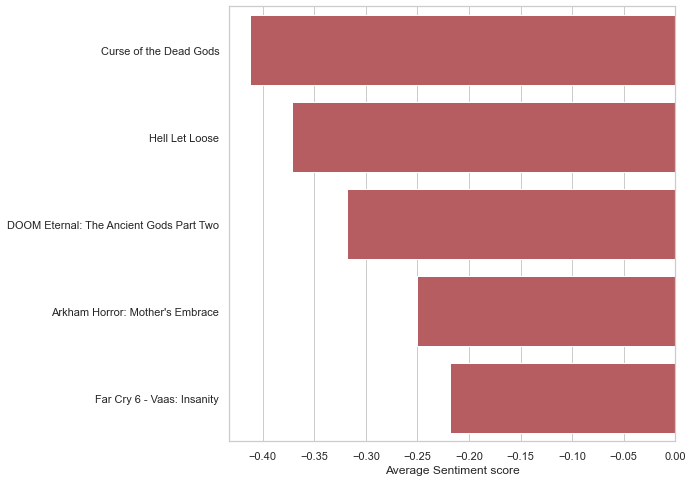

In [173]:
#Top 5 negative sentiment Games 
negative = sentiments_group.sort_values(by='average_sentiment')[:5]
sns.barplot(y="game_name", x="average_sentiment", data=negative, color="r")
plt.xlabel("Average Sentiment score")
plt.ylabel("");

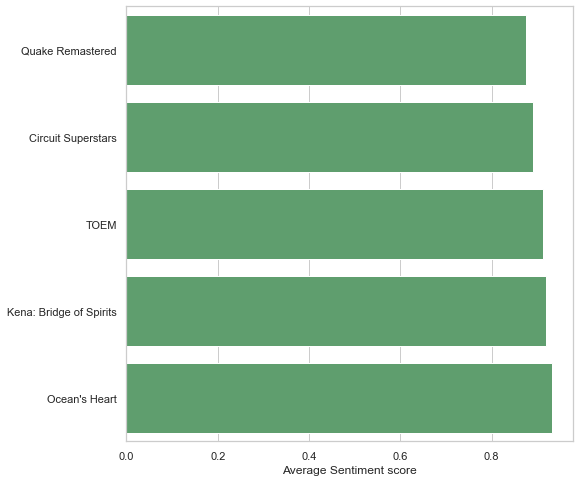

In [174]:
#Top 5 Positive sentiment Games 
negative = sentiments_group.sort_values(by='average_sentiment')[-5:]
sns.barplot(y="game_name", x="average_sentiment", data=negative, color="g")
plt.xlabel("Average Sentiment score")
plt.ylabel("");

Ocean's Heart reviews has the highest average positive sentiment whereas Curse of the Dear Gods has the worst average sentiment score

In [499]:
reviews.to_csv(data_dir+"reviews_sentiment.csv")
final_df = reviews.copy()

In [501]:
final_df

,game_id,game_name,score,author,date,summary,tokenised,lemmatized,sentiment_label,sentiment_value
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...,"[Traversing, mind, character, much, plot, case...",Traversing mind character much plot case ’ try...,negative,-0.2960
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...,"[Disco, Elysium, –, The, Final, Cut, something...",Disco Elysium – The Final Cut something rare ...,positive,0.9142
2,0,Disco Elysium: The Final Cut,100,KeenGamer,"Apr 26, 2021","Enhanced with fantastic and fresh content, Dis...","[Enhanced, fantastic, fresh, content, ,, Disco...",Enhanced fantastic fresh content Disco Elysiu...,positive,0.9423
3,0,Disco Elysium: The Final Cut,100,GameSpot,"Apr 15, 2021",A fully voiced cast and new content of compara...,"[A, fully, voiced, cast, new, content, compara...",A fully voiced cast new content comparable qua...,positive,0.8705
4,0,Disco Elysium: The Final Cut,100,Wccftech,"Apr 15, 2021",Disco Elysium: The Final Cut doesn't shy away ...,"[Disco, Elysium, :, The, Final, Cut, n't, shy,...",Disco Elysium The Final Cut nt shy away probl...,negative,-0.4731
...,...,...,...,...,...,...,...,...,...,...
5502,320,eFootball 2022,30,PC Gamer,"Oct 13, 2021","In PR terms, it's the world's costliest public...","[In, PR, terms, ,, 's, world, 's, costliest, p...",In PR term s world s costliest public beta T...,neutral,0.0000
5503,320,eFootball 2022,28,GameStar,"Oct 10, 2021",It's the worst-rated game on Steam for a reaso...,"[It, 's, worst-rated, game, Steam, reason, ,, ...",It s worstrated game Steam reason soccer fan ...,negative,-0.6486
5504,320,eFootball 2022,20,Gamer.no,"Oct 10, 2021","The game is straight up horrible, and I can’t ...","[The, game, straight, horrible, ,, I, ’, under...",The game straight horrible I ’ understand som...,neutral,-0.0258
5505,320,eFootball 2022,20,PC Games,"Oct 5, 2021",The Pro Evolution Soccer series was all the ti...,"[The, Pro, Evolution, Soccer, series, time, wo...",The Pro Evolution Soccer series time worthy op...,negative,-0.0644


VADER doesn't seem to be performing well for the reviews dataset. For example for the review below, it gives it a negative sentiment but it's not exactly a negative review and the score given by reviewer is 100.  With GPT3, we get a positive sentiment which makes more sense (https://beta.openai.com/playground/p/default-tweet-classifier?model=text-davinci-001). 

In [180]:
final_df.iloc[4,5] 

"Disco Elysium: The Final Cut doesn't shy away from its problems, but each one just cements how interesting those flaws are. Minor technical issues can be fixed, but what the game does, how it does it, and how the player responds is something that no other medium, no other game has achieved."

In [181]:
final_df.iloc[4,8] 

'negative'

In [182]:
final_df.head(2)

,game_id,game_name,score,author,date,summary,tokenised,lemmatized,sentiment_label,sentiment_value,...,would,writing,year,yet,you,–,—,’,“,”
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...,"[Traversing, mind, character, much, plot, case...",Traversing mind character much plot case ’ try...,negative,-0.2960,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.435831,0.0,0.0
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...,"[Disco, Elysium, –, The, Final, Cut, something...",Disco Elysium – The Final Cut something rare ...,positive,0.9142,...,0.0,0.0,0.0,0.0,0.0,0.261586,0.0,0.353187,0.0,0.0


## Topic Modelling 

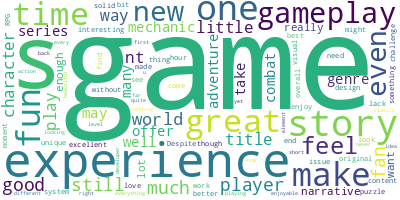

In [502]:
#!pip install wordcloud
from wordcloud import WordCloud
long_string = ','.join(list(final_df['lemmatized'].values))
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

We can see reviews contain information about character, narrative, story, feel, experience etc

In [547]:
#!pip install gensim
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
import nltk
stop_words = stopwords.words('english')
stop_words.extend(['game','like', 'new','good', 'great', 'much','best', 'one', 'from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

def get_topics(data_df, num_topics=10, num_words=10):
    data = data_df.values.tolist()
    data_words = list(sent_to_words(data))
    # remove stop words
    data_words = remove_stopwords(data_words)
    #print(data_words[:1][0][:30])
    
    # Create Dictionary
    id2word = corpora.Dictionary(data_words)
    # Create Corpus
    texts = data_words
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]
    # View
    #print(corpus[:1][0][:30])
    
    
    # number of topics
    num_topics = num_topics
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           chunksize=10,
                                          passes = 10,
                                          per_word_topics=True,
                                          minimum_probability= 0.001)
    # Print the Keyword in the 10 topics
    #pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]
    """
    #=============================
    #USE IT TO VISUALISE THE TOPICS 
    #=============================

    #!pip install pyldavis
    import pyLDAvis.gensim_models
    import os
    import pickle 
    import pyLDAvis
    # Visualize the topics
    pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)"""
    #list of all words used to describe the 10 topics 
    num_words = num_words
    terms = []
    x=lda_model.show_topics(num_topics=num_topics, num_words=num_words,formatted=False)
    for tp in x:
        for w in tp[1]:
            if w not in terms:
                terms.append(w[0])
    #topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
    term_id = []
    topic_names = []
    for i in range(num_topics): 
        #name
        names = lda_model.show_topic(i, topn=num_words)
        term_id.append(names)
        topic_names.append("Topic" + str(i))
        
    topic_term_pd = pd.DataFrame(columns=terms, index=topic_names )
    for i in range(num_topics):
        for j in range(len(term_id[i])):
            word = term_id[i][j][0]
            topic_term_pd.loc["Topic" + str(i),word]=term_id[i][j][1]
    topic_term_pd.fillna(-1, inplace=True)
    
    topic_term = pd.DataFrame(topic_term_pd.idxmax())
    topic_term.reset_index(inplace=True)
    topic_term.columns=['word','topic']
    topic_term.to_csv(data_dir+"topic-terms-matrix.csv")
    print(topic_term['topic'].value_counts())
    
    n_components = num_topics
    fig = plt.figure(figsize=(10, 15))
    j = np.ceil(n_components/4)
    for t in range(n_components):
        i=t+1
        plt.subplot(j, 4, i).set_title("Topic #" + str(t))
        plt.plot()
        long_string = ','.join(list(topic_term.loc[topic_term['topic']==("Topic"+str(t)), "word"].values))
        plt.imshow(WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue').generate(long_string))
        plt.axis("off")
    fig.suptitle("Word Cloud")
    plt.show()


    



In [548]:
"""
#try after removing the game names 

#list of all game names 
game_names = []
for i in final_df['game_name'].values:
    for j in i.lower().split():
        if j not in game_names:
            game_names.append(j)
            
#removing game names 
def summary_stripped(x):
    summ = x.split()
    resultwords  = [word for word in summ if word.lower() not in game_names]
    result = ' '.join(resultwords)
    return result

final_df['summary_stripped'] = final_df['lemmatized'].apply(lambda x: summary_stripped(x))"""

#It didn't work well

"\n#try after removing the game names \n\n#list of all game names \ngame_names = []\nfor i in final_df['game_name'].values:\n    for j in i.lower().split():\n        if j not in game_names:\n            game_names.append(j)\n            \n#removing game names \ndef summary_stripped(x):\n    summ = x.split()\n    resultwords  = [word for word in summ if word.lower() not in game_names]\n    result = ' '.join(resultwords)\n    return result\n\nfinal_df['summary_stripped'] = final_df['lemmatized'].apply(lambda x: summary_stripped(x))"

Topic3     14
Topic9     12
Topic11    12
Topic18    12
Topic16    11
Topic6     11
Topic10    11
Topic8     10
Topic19    10
Topic13    10
Topic2     10
Topic5     10
Topic1     10
Topic0      9
Topic15     9
Topic12     9
Topic4      9
Topic7      8
Topic17     8
Topic14     5
Name: topic, dtype: int64


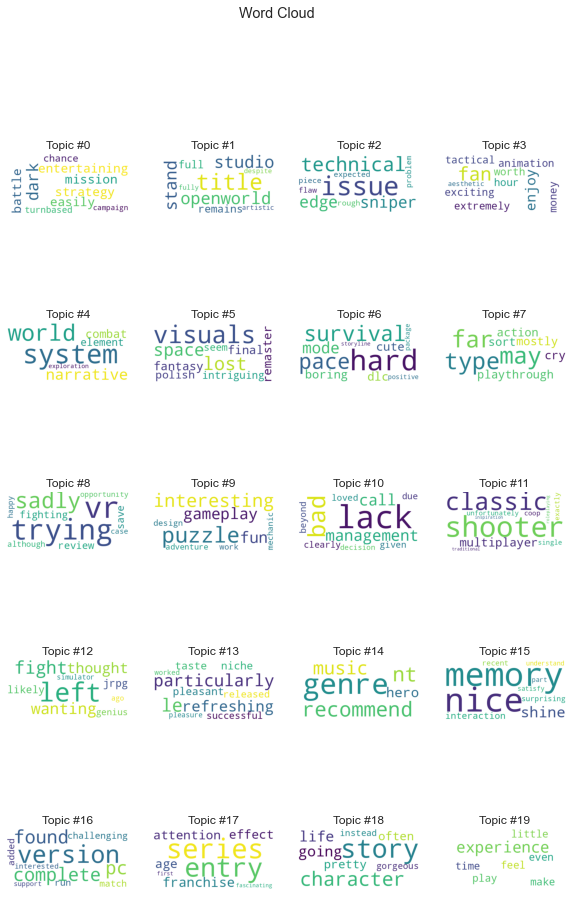

In [549]:
get_topics(final_df['lemmatized'],num_topics=20, num_words=10)